# Telco Customer Churn

Predicting which customers are most likely to leave the company to better allocate their recources.

    I don't actually work for them I'm just doing this for fun :)

## Project Goal

This project aims to create a model that can take in data about customers of the telco company and predicts if they are going to churn or not.

## Aims

This project intends to:
    -Take in the data of ~7,000 telco customers and predict if they will churn or not.
    -Find variables that make a customer more at risk of churning.

## Definition(s)

Churn: Also known as customer attrition, when a customer stops doing business with an entity, in this case, the Teclo company.

## Data

This project uses [this dataset from kaggle](https://www.kaggle.com/blastchar/telco-customer-churn). It has numerical and categorical data from 7043 customers ranging from their total yearly charges to if the customer has dependents or of they are a senior citizen (etc.). 

All boolean + categorical data was fit to sklearn's label encoder so it could be used in predictive models and all numerical data was run through sklearn's standard scaler to avoid skew from some numerical columns having larger range than others. The only column not used was customer ID as it could only be harmful to include such information. All the data preprocessing can be found in the src folder in dataprep.py. 

Two train test splits were done to gain a test set to evaluate the final model, and a validation set to train the data and make validation tests to see how its doing without using the test data as to aviod bias. 

    X = df.drop(['Churn'],  axis=1)
    y = df['Churn']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 7)
    X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = .2, random_state = 7)

## EDA

Most of the EDA done was a correlation matrix and visualizations that helped highlight obvious differences between the churned and non churned customers.

#### Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.dataprep import prep_df
from src.vis_methods import vis_compare

#### Pre EDA

In [11]:
data_path = 'data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(data_path)
churn_df = df[df["Churn"] == "Yes"]
no_churn_df = df[df["Churn"] == "No"]

This method was used to make all the bar charts in the EDA notebook

In [12]:
def vis_compare(column, buul = True):
    
    print('Key:')
    print('Churned + Not Churned, Churned, Not Churned')
    print(df[column].value_counts())
    fig, ax = plt.subplots(1, 3, figsize = (15,4))
    
    a = sns.countplot(df[column], ax=ax[0])
    b = sns.countplot(churn_df[column], ax=ax[1])
    c = sns.countplot(no_churn_df[column], ax=ax[2])
    
    if buul == False:
        a.set_xticklabels(a.get_xticklabels(), rotation = 30)
        b.set_xticklabels(b.get_xticklabels(), rotation = 30)
        c.set_xticklabels(c.get_xticklabels(), rotation = 30)
    
    a.set_title('Churned + Not Churned')
    b.set_title('Churned')
    c.set_title('Not Churned')

#### *Now* onto EDA

#### Visualizations

Key:
Churned + Not Churned, Churned, Not Churned
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Key:
Churned + Not Churned, Churned, Not Churned
No     3641
Yes    3402
Name: Partner, dtype: int64
Key:
Churned + Not Churned, Churned, Not Churned
No     4933
Yes    2110
Name: Dependents, dtype: int64


/Users/adamroth/opt/anaconda3/envs/telco/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adamroth/opt/anaconda3/envs/telco/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adamroth/opt/anaconda3/envs/telco/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

Key:
Churned + Not Churned, Churned, Not Churned
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
Key:
Churned + Not Churned, Churned, Not Churned
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


/Users/adamroth/opt/anaconda3/envs/telco/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adamroth/opt/anaconda3/envs/telco/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adamroth/opt/anaconda3/envs/telco/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

Key:
Churned + Not Churned, Churned, Not Churned
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
Key:
Churned + Not Churned, Churned, Not Churned
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


/Users/adamroth/opt/anaconda3/envs/telco/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adamroth/opt/anaconda3/envs/telco/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adamroth/opt/anaconda3/envs/telco/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

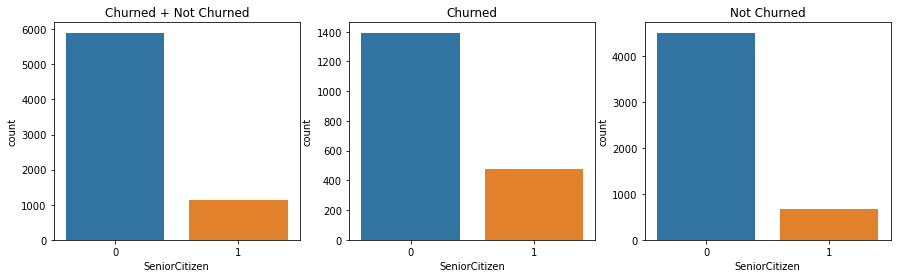

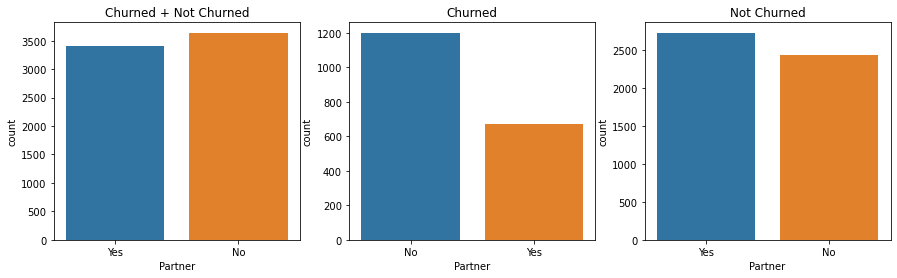

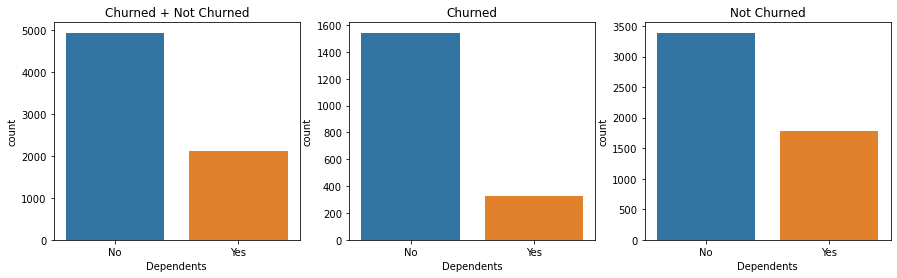

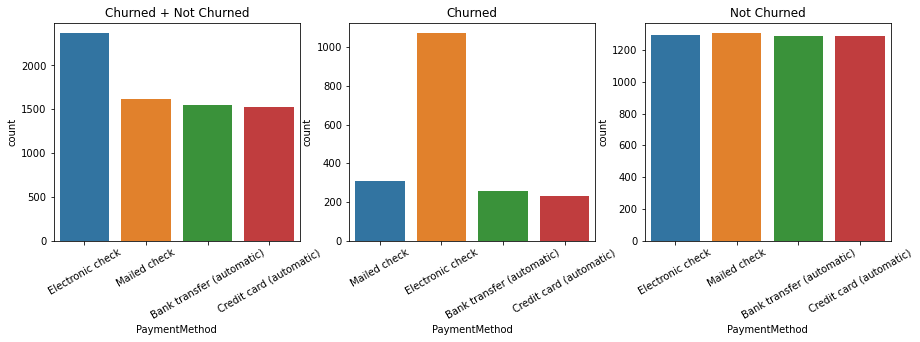

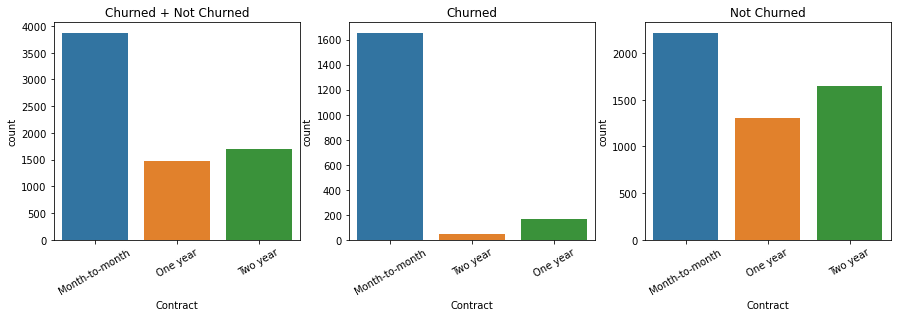

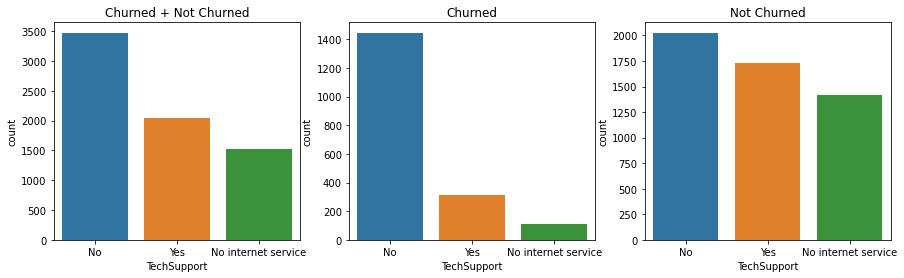

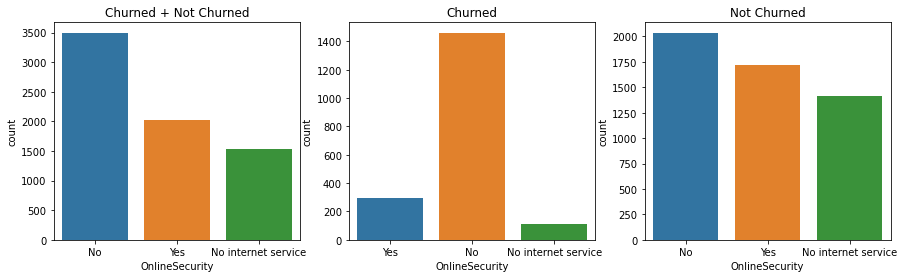

In [14]:
vis_compare('SeniorCitizen')
vis_compare('Partner')
vis_compare('Dependents')
vis_compare('PaymentMethod', False)
vis_compare('Contract', False)
vis_compare('TechSupport')
vis_compare('OnlineSecurity')

#### Correlation Matrix

<AxesSubplot:>

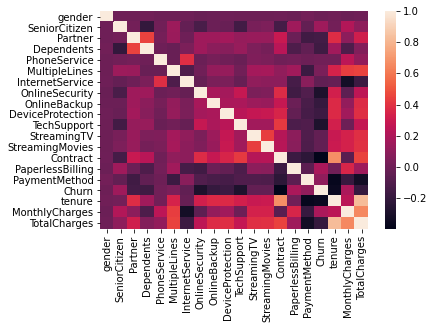

In [15]:
df2 = prep_df()
corr_matrix = df2.corr()
sns.heatmap(corr_matrix)

Although I had already made most of my visualizations before this correlation matrix it did allow me to better understand where to look for variables which are related to customer churn. The variables I had missed being online security and tech suppourt. 

## Modeling

I used two kinds of classification models in this iteration of the project, (I plan on returning to this, I'll talk more about it in the next steps section towards the bottom) KNN (K nearest neighbors) and randomforest. The accuracy score was used to determine the model's effectiveness. 

#### Modeling prep

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors, metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

df = prep_df()

X = df.drop(['Churn'],  axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 7)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = .2, random_state = 7)

#### FSM(s)

The first two simple models were vanilla and untuned versions of a KNN and a randomforest model

In [21]:
knn = neighbors.KNeighborsClassifier()

knn.fit(X_t, y_t)
print("Train:")
print(knn.score(X_t, y_t))
print("Val:")
print(knn.score(X_val, y_val))

Train:
0.8348888888888889
Val:
0.7493333333333333


In [24]:
y_hat = knn.predict(X_val)
print(confusion_matrix(y_val, y_hat))
print('[TP, FP]')
print('[FN, TN]')

[[724 118]
 [164 119]]
[TP, FP]
[FN, TN]


In [25]:
rf = RandomForestClassifier(random_state = 7)
rf.fit(X_t, y_t)

print("Train:")
print(rf.score(X_t, y_t))
print("Val:")
print(rf.score(X_val, y_val))

y_hat2 = rf.predict(X_val)
print(confusion_matrix(y_val, y_hat2))
print('[TP, FP]')
print('[FN, TN]')

Train:
0.9977777777777778
Val:
0.7822222222222223
[[757  85]
 [160 123]]
[TP, FP]
[FN, TN]


The fsm random forest did produce a better validation accuracy score, but it is *very* overfit. At this point I wished to tune the models to produce a better accuracy score and in the case of the random forest I sought to make it less overfit.

For the KNN I had begun to first change around the k value, once I found a value which produced a higher validation accuracy score I then moved on to changing around the p value, which best performed at p = 1.

In [26]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 11, p = 1)
knn.fit(X_t, y_t)

print("Train:")
print(knn.score(X_t, y_t))
print("Val:")
print(knn.score(X_val, y_val))

y_hat = knn.predict(X_val)
print(confusion_matrix(y_val, y_hat))
print('[TP, FP]')
print('[FN, TN]')

Train:
0.8208888888888889
Val:
0.7795555555555556
[[731 111]
 [137 146]]
[TP, FP]
[FN, TN]


For the random forest I had 3 parameters I believed that I could manipulate in order to fight the overfitting: n_estimators, max_depth, and max_features. I first began by increasing the n_estimators to 100, while this did not help with the overfitting, it did increase the validation accuracy by a little bit. Bringing the max_depth down to 7, which had an immediate impact on the overfitting, brinning the training accuracy down from 1.0 to .78, which was even lower than the validation accuracy. Bringing the max_features down to 5 then produced the best model. 

In [28]:
rf = RandomForestClassifier(n_estimators=100, max_depth=7, max_features=5, random_state = 7)
rf.fit(X_t, y_t)

print("Train:")
print(rf.score(X_t, y_t))
print("Val:")
print(rf.score(X_val, y_val))

y_hat2 = rf.predict(X_val)
print(confusion_matrix(y_val, y_hat2))
print('[TP, FP]')
print('[FN, TN]')

Train:
0.8313333333333334
Val:
0.8035555555555556
[[771  71]
 [150 133]]
[TP, FP]
[FN, TN]


#### Recent changes

Although those numbers look nice they are decieving, the data is very imbalanced with there being signifigantly more 'not churned' (0) customers than 'churned' (1) customers, leading to bias in favor of 'not churned'. I had fixed this using the *Synthetic Minority Oversampling Technique*, aka: SMOTE. This caused the balance to go from this:

## *Former* Final Model

The final model was the same one used above as it produced the best validation accuracy score. 

In [30]:
rf = RandomForestClassifier(n_estimators=100, max_depth=7, max_features=5, random_state = 7)
rf.fit(X_train, y_train)

print("Train:")
print(rf.score(X_train, y_train))
print("Test:")
print(rf.score(X_test, y_test))

y_hat = rf.predict(X_test)
print(confusion_matrix(y_test, y_hat))
print('[TP, FP]')
print('[FN, TN]')

cf_mat = confusion_matrix(y_test, y_hat)
print(cf_mat)
sns.heatmap(cf_mat, annot=True)

Train:
0.8304
Test:
0.7938877043354655
[[932  85]
 [205 185]]
[TP, FP]
[FN, TN]


## *New* Final Model

In [1]:
smote = SMOTE()
X_train_s, y_train_s = smote.fit_sample(X_train, y_train)

rf = RandomForestClassifier(n_estimators=255, max_depth=10, max_features=5, random_state = 7)

rf.fit(X_train_s, y_train_s)
train_pred = rf.predict(X_train_s)
print("Recall:")
print("Train:")
print(recall_score(train_pred, y_train_s))
val_pred = rf.predict(X_test)
print("Test:")
print(recall_score(val_pred, y_test))
print(" ")
print("Accuracy:")
print("Train:")
print(rf.score(X_train_s, y_train_s))
print("Test:")
print(rf.score(X_test, y_test))

y_hat = rf.predict(X_test)
cf_mat = confusion_matrix(y_test, y_hat)
print(cf_mat)
sns.heatmap(cf_mat, annot=True)

NameError: name 'SMOTE' is not defined

## Results

(old and incorrect)
In the end the best performing model for accuracy was the random forest with a .79. I will note that other times I had run it without the random state it had managed to go over .8, however it would be hacky of me to keep rolling the virtual dice to do so. 


(New and better


Based on the visualizations made earlier it is looking like customers with monthly contracts are especially likely to churn. Additonal traits to look out for are customers who are senior citizens, have no partner, no dependents, pay their bills with an electronic check, and did not purchase any tech support and/ or online security plans. 

## Next Steps

For the next time I work on this project I am palnning on doing things differently. For starters I had used accuracy as my model performance score. Using accuracy is not necessarily a bad idea for predictive modeling, however while working with customer churn I am theoretically advising a company on how to allocate their funds on specific people who are at risk of churning. Mistakenly claiming someone may churn out while in reality they won't (this is in refrence to false negatives/ FN in the confusion matrix) could end up costing the company money that they do not need to spend on people they do not need to pay extra attention to. This is why I will be using the recall score over the accuracy score in the next iteration of this project. If I were doing this with false negatives in mind and tuning the mdoels for recall over accuracy, the KNN model would have likely won. 

One avenue that is definetly worth exploring is using something like SMOTE to even out the number of churned vs non churned customers. This will certainly be done in the phase 2 of this project, but I am mostly stopping for now as I want to work on other things.